In [86]:
# Libraries
library(anytime)
library(MASS)
library(fitdistrplus)
library(dotenv)

In [88]:
getwd()
setwd('..')

[1] "C:/Users/maste/OneDrive/Documentos/Code_ks/googletrends_trading/data/tokens"

In [89]:
# Load paths
setwd('..')
load_dot_env()
trends_path <- Sys.getenv("GOOGLE_TRENDS")
crypto_path <- Sys.getenv("CRYPTO")
data_path <- Sys.getenv("DATA_PATH")
my_root <- Sys.getenv("MY_ROOT")

Warning message in readLines(file):
"incomplete final line found on '.env'"

# Loading data base and getting returns column

In [90]:
setwd(crypto_path)

# Load dataset
bp <- read.table("btc_price.csv", sep=",", header = TRUE)

In [48]:
# Checkout the data
head(bp)

o_time,open,high,low,close,volume,c_time,qa_time,number_trades,tbav,tbav2,ignored
2017-08-17 00:00:00-05:00,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999000064-05:00,100304.824,102,21.448071,92608.280,8039.262
2017-08-17 01:00:00-05:00,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999000064-05:00,31282.313,36,4.802861,20795.317,8041.760
2017-08-17 02:00:00-05:00,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999000064-05:00,19241.058,25,2.602292,11291.347,8048.128
2017-08-17 03:00:00-05:00,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999000064-05:00,4239.504,28,0.814655,3552.747,8018.037
2017-08-17 04:00:00-05:00,4360.00,4445.78,4360.00,4444.00,10.763623,2017-08-17 04:59:59.999000064-05:00,47219.356,43,10.258400,44995.378,8037.265
2017-08-17 05:00:00-05:00,4441.10,4470.00,4399.81,4460.00,24.865399,2017-08-17 05:59:59.999000064-05:00,110290.729,82,21.698693,96225.973,7981.746


In [11]:
# Just in case of raw data from binance
#bp$o_time <- anytime(bp$o_time/1000)
#bp$c_time <- anytime(bp$c_time/1000)

In [91]:
# We get just OHLCV columns and the open_time column
bp <- bp[c('o_time', 'open', 'high', 'low', 'close', 'volume')]
head(bp)

o_time,open,high,low,close,volume
2017-08-17 00:00:00-05:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 01:00:00-05:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 02:00:00-05:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 03:00:00-05:00,4333.32,4377.85,4333.32,4360.69,0.972807
2017-08-17 04:00:00-05:00,4360.00,4445.78,4360.00,4444.00,10.763623
2017-08-17 05:00:00-05:00,4441.10,4470.00,4399.81,4460.00,24.865399


In [92]:
# Function for getting retuns column:
ln_returns <- function(x){
  # Incializas la variable "a".
  a <- NULL
  a[1] <- NA
  # Cada "x" esta pensado para recibir un vector (recibirá cada columna de la base)
  for(i in 2:length(x)){
    #a[i] <- log(x[i]/x[i-1])
    a[i] <- (x[i] - x[i-1])/x[i-1] 
    if(is.infinite(a[i]) | is.nan(a[i])){
      a[i] <- 0
    } else{
      a[i] <- a[i]*100
    }
  }
  return(a)
}

In [93]:
# Getting returns
bp$returns <- bp$close
bp$returns <- ln_returns(bp$returns)
bp <- tail(bp, (dim(bp)[1]-1))
head(bp)
tail(bp)

,o_time,open,high,low,close,volume,returns
2,2017-08-17 01:00:00-05:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.2092545
3,2017-08-17 02:00:00-05:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.5929215
4,2017-08-17 03:00:00-05:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.2459776
5,2017-08-17 04:00:00-05:00,4360.00,4445.78,4360.00,4444.00,10.763623,1.9104775
6,2017-08-17 05:00:00-05:00,4441.10,4470.00,4399.81,4460.00,24.865399,0.3600360
7,2017-08-17 06:00:00-05:00,4460.00,4485.39,4427.30,4427.30,27.018053,-0.7331839


,o_time,open,high,low,close,volume,returns
29332,2020-12-25 19:00:00-06:00,24601.07,24932.16,24500.00,24907.78,3747.828,1.2418783
29333,2020-12-25 20:00:00-06:00,24907.78,24976.00,24750.00,24838.27,3438.875,-0.2790694
29334,2020-12-25 21:00:00-06:00,24838.27,25039.96,24815.52,24909.79,3949.926,0.2879428
29335,2020-12-25 22:00:00-06:00,24909.80,24920.00,24745.41,24810.06,2386.010,-0.4003647
29336,2020-12-25 23:00:00-06:00,24810.06,24843.44,24661.30,24708.87,2783.609,-0.4078587
29337,2020-12-26 00:00:00-06:00,24708.87,24868.98,24652.54,24830.66,1689.136,0.4928999


# Returns column analysis

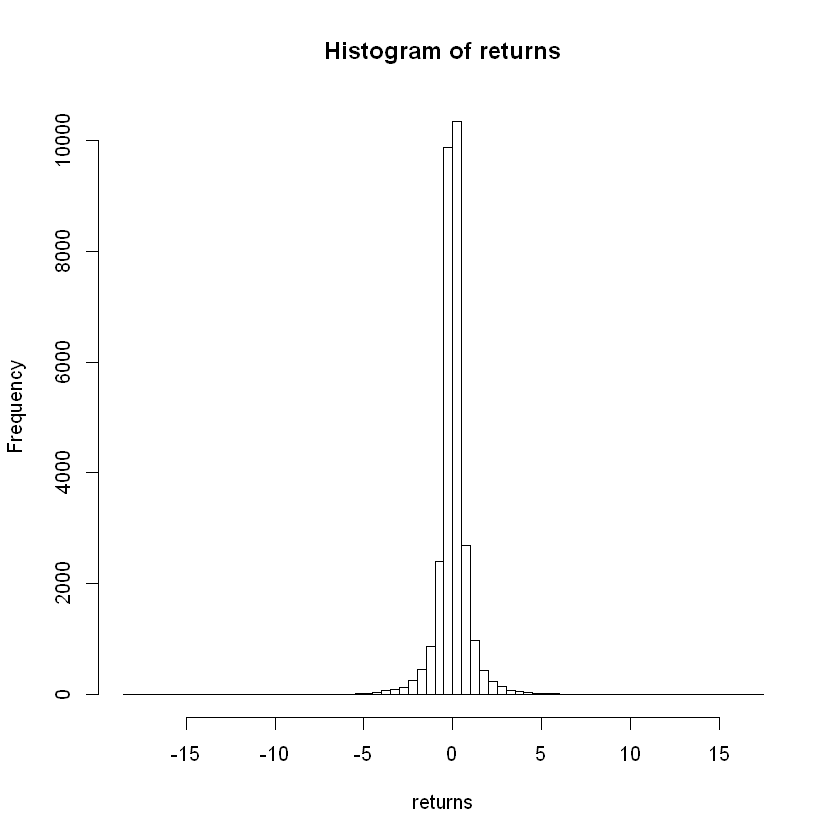

In [52]:
# Returns histogram
returns <- bp$returns
hist(returns, 100)

summary statistics
------
min:  -18.21147   max:  17.38399 
median:  0.01354967 
mean:  0.0109295 
estimated sd:  0.961144 
estimated skewness:  -0.04035676 
estimated kurtosis:  35.54265 

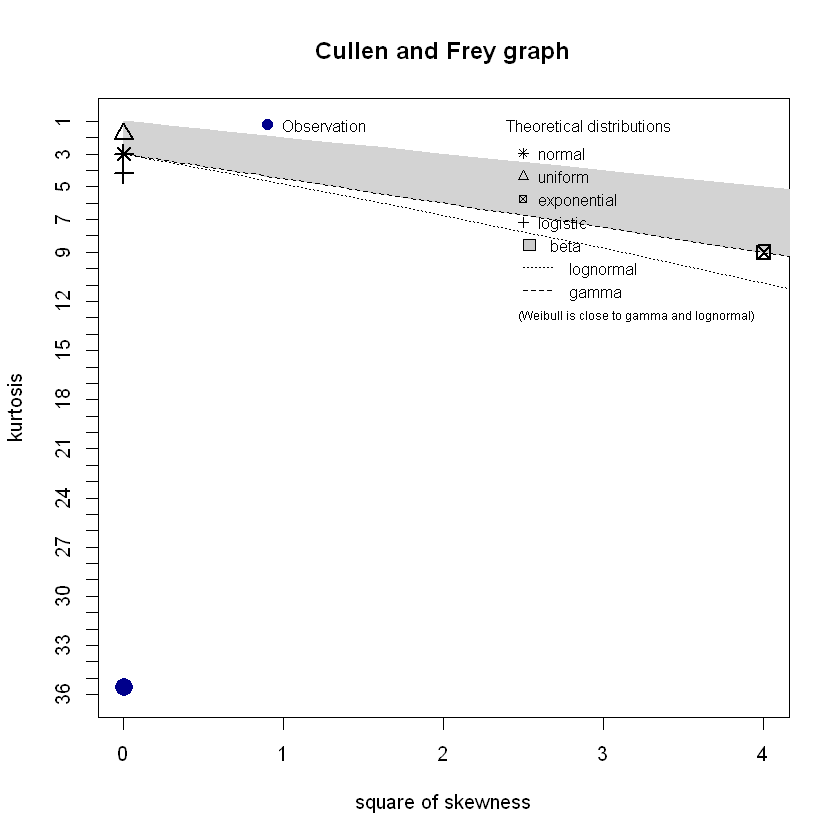

In [53]:
descdist(returns)

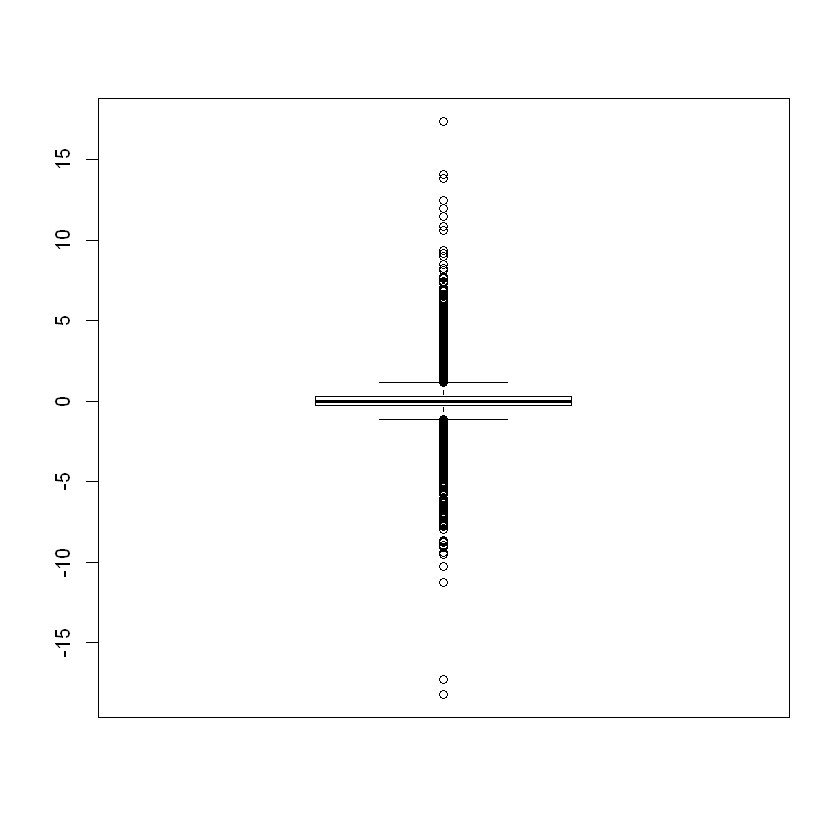

In [54]:
boxplot(returns)

## Adjusting a curve (Normal or t-student)

**Critical values need to be founded for the next model selection**

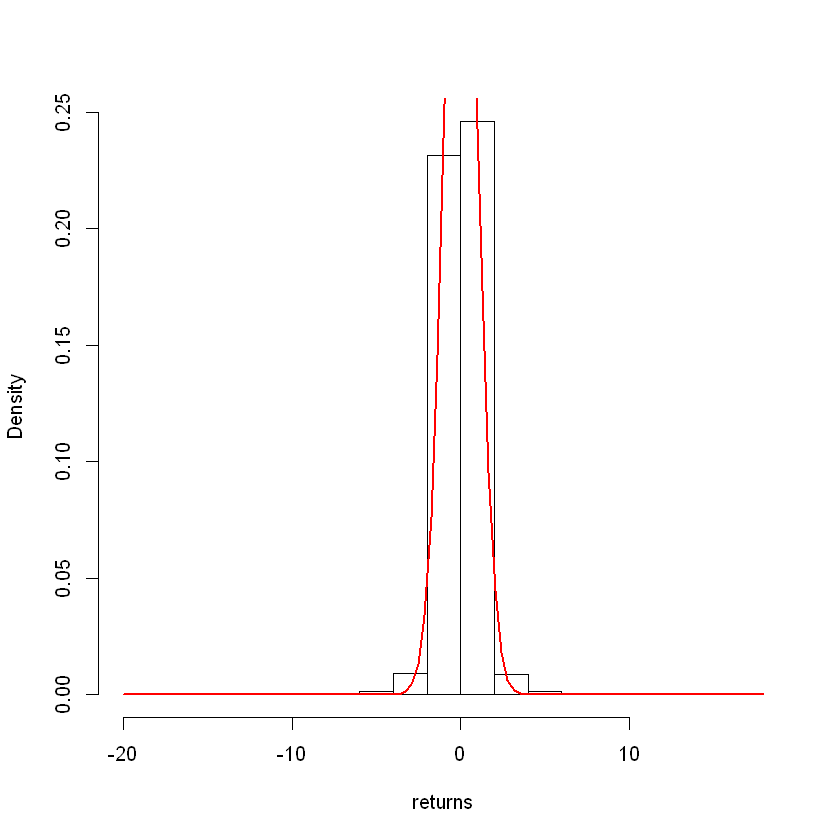

In [96]:
# Normal histogram
hist(returns, prob=TRUE, main="")
curve(dnorm(x, fit1$estimate[1], fit1$estimate[2]), col="red", lwd=2, add=T)

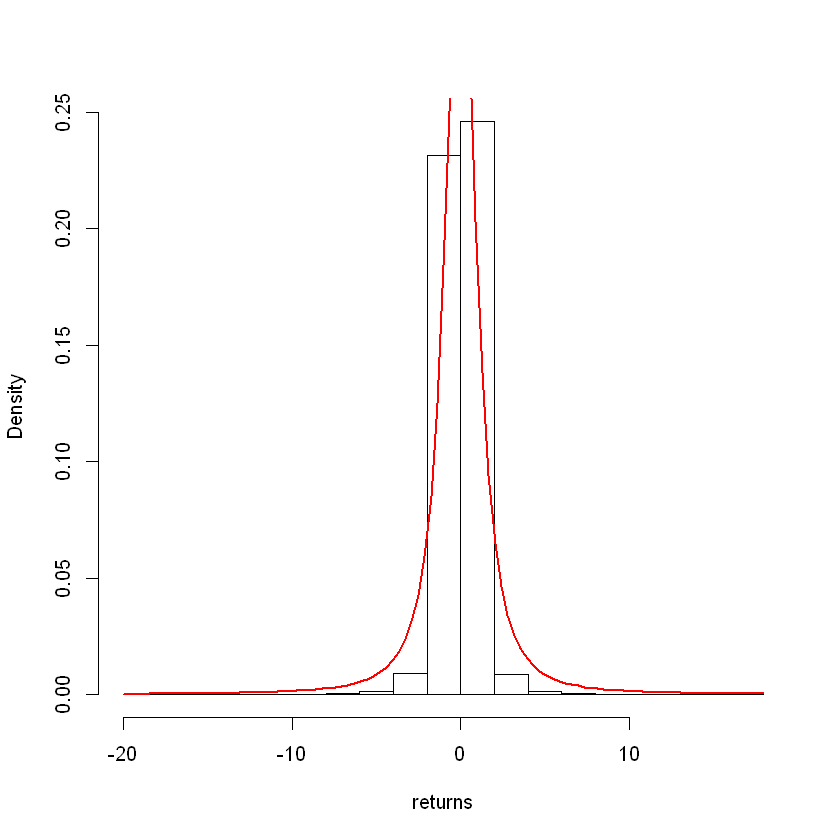

In [97]:
# t histogram
hist(returns, prob=TRUE, main="")
curve(dt(x, fit2$estimate[3]), col="red", lwd=2, add=T)

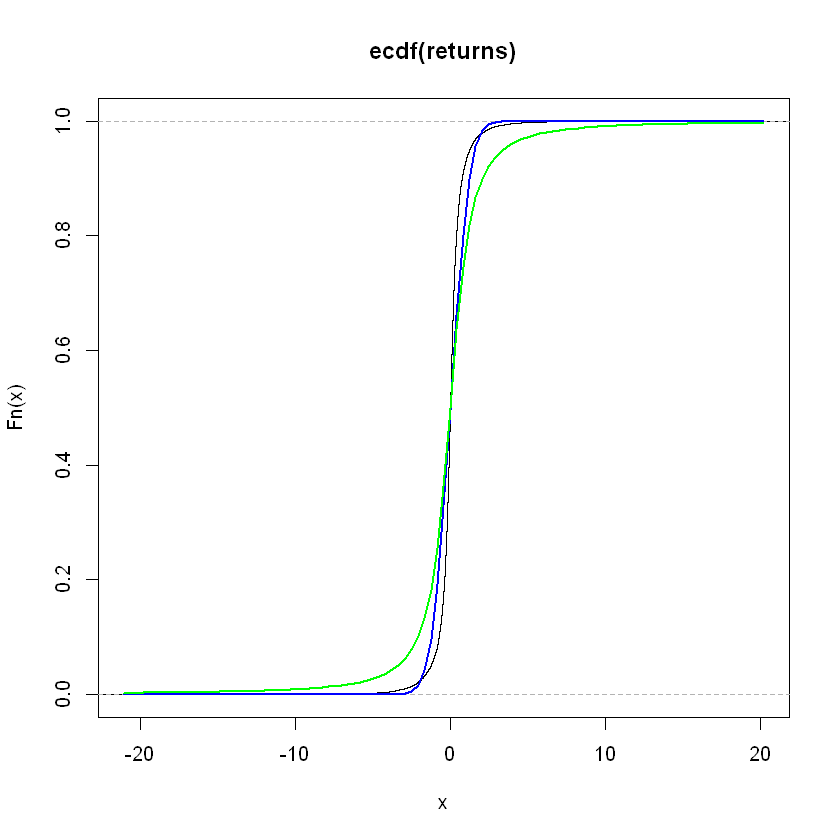

In [98]:
plot(ecdf(returns))
curve(pnorm(x, fit1$estimate[1], fit1$estimate[2]), col="blue", lwd=2, add=T)
curve(pt(x, fit2$estimate[3]), col="green", lwd=2, add=T)

**For greater "precision", Akaike and Bayesian criterions are used**

In [99]:
# 
k <- 2
n <- length(returns)


distro <- c("Normal", "t-student")
aic_col <- c(2*k - 2*fit1$loglik, 2*k - 2*fit2$loglik)
bic_col <- c(log(n)*k - 2*fit1$loglik, log(n)*k - 2*fit2$loglik)

tab <- data.frame(Distribution= distro, AIC=aic_col, BIC=bic_col)

tab

Distribution,AIC,BIC
Normal,81001.45,81018.03
t-student,59436.33,59452.91


**Thus a t-student distribution fits better**
>**Finally the returns are dived into 3 equal parts for the model selection and simplicity**

In [100]:
# Get values for separation
r_a <- qt(.33333, fit2$estimate[3])#/100
r_b <- qt(.66666, fit2$estimate[3])#/100

print("Returns values")
r_a
r_b

[1] "Returns values"


[1] -0.5158657

[1] 0.5158304

# Joining google trends and btc prices returns

In [94]:
setwd(trends_path)

# Load dataset
gt <- read.table("google trends.csv", sep=",", header = TRUE)

In [95]:
# Change date format's google trends 
gt$date <- as.POSIXct(gt$date, format = "%Y-%m-%d %H:%M:%OS")

# Extract a subset from btc prices 
new_bp <- bp[c("o_time", "returns")]
colnames(new_bp) <- c("date", "returns")
new_bp$date <- as.POSIXct(new_bp$date, format = "%Y-%m-%d %H:%M:%OS")
new_bp <- subset(new_bp, date > as.POSIXct("2017-08-27 08:00:00", format= "%Y-%m-%d %H:%M:%OS"))


# Merge google trends & price returns 
db <- merge(gt, new_bp, by="date", all = TRUE) 


setwd(data_path)
write.csv(db, file = "data_base.csv", row.names = FALSE)